In [1]:
from segmenter_api.utils.file import get_project_dir

%cd {get_project_dir()}
print(get_project_dir())

/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api
/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api


In [2]:
from pathlib import Path

import requests
from PIL import Image

from segmenter_api.domain.factory.detector_factory import DetectorType
from segmenter_api.domain.factory.segmenter_factory import SegmenterType
from segmenter_api.usecase.ui.text2segment import (
    Text2SegmentRequest,
)
from segmenter_api.utils.image import boolean2image, pil2base64

In [3]:
server_url = "http://localhost:8080/text2segment"

In [4]:
image_path = Path("tests/data/abema_water.png")
image = Image.open(image_path)

In [5]:
request = Text2SegmentRequest(
    detector_type=DetectorType.FLORENCE2,
    segmenter_type=SegmenterType.SAM2,
    image=pil2base64(image=image),
    texts=["plastic bottle", "green character"],
)

In [6]:
request_data = request.model_dump()

In [7]:
print(request_data["detector_type"])
print(request_data["segmenter_type"])
print(request_data["image"][:30])
print(request_data["texts"])

florence2
sam2
iVBORw0KGgoAAAANSUhEUgAABAAAAA
['plastic bottle', 'green character']


In [8]:
response = requests.post(server_url, json=request.model_dump())

In [9]:
response_data = response.json()

In [10]:
boolean_masks = response_data["masks"]

KeyError: 'masks'

In [22]:
mask_images = [boolean2image(boolean_mask) for boolean_mask in boolean_masks]

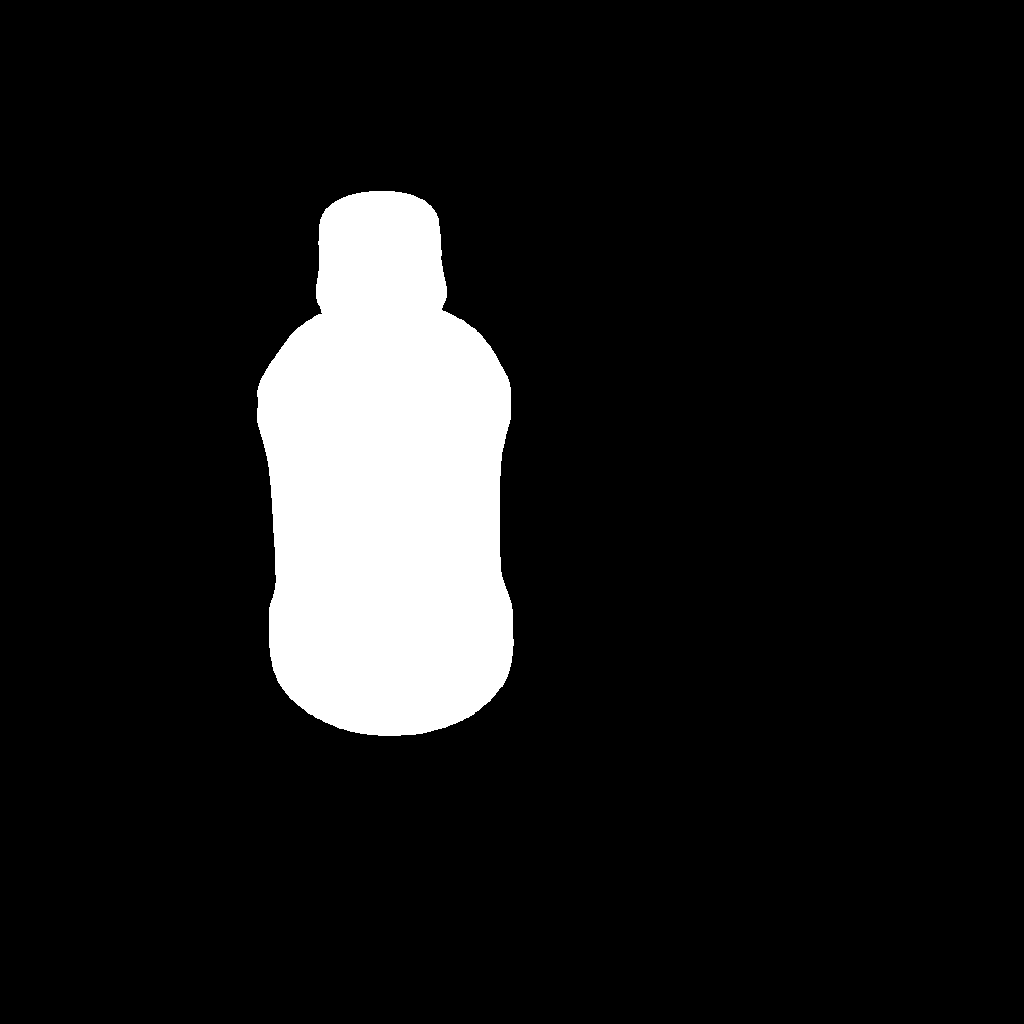

In [23]:
mask_images[0]

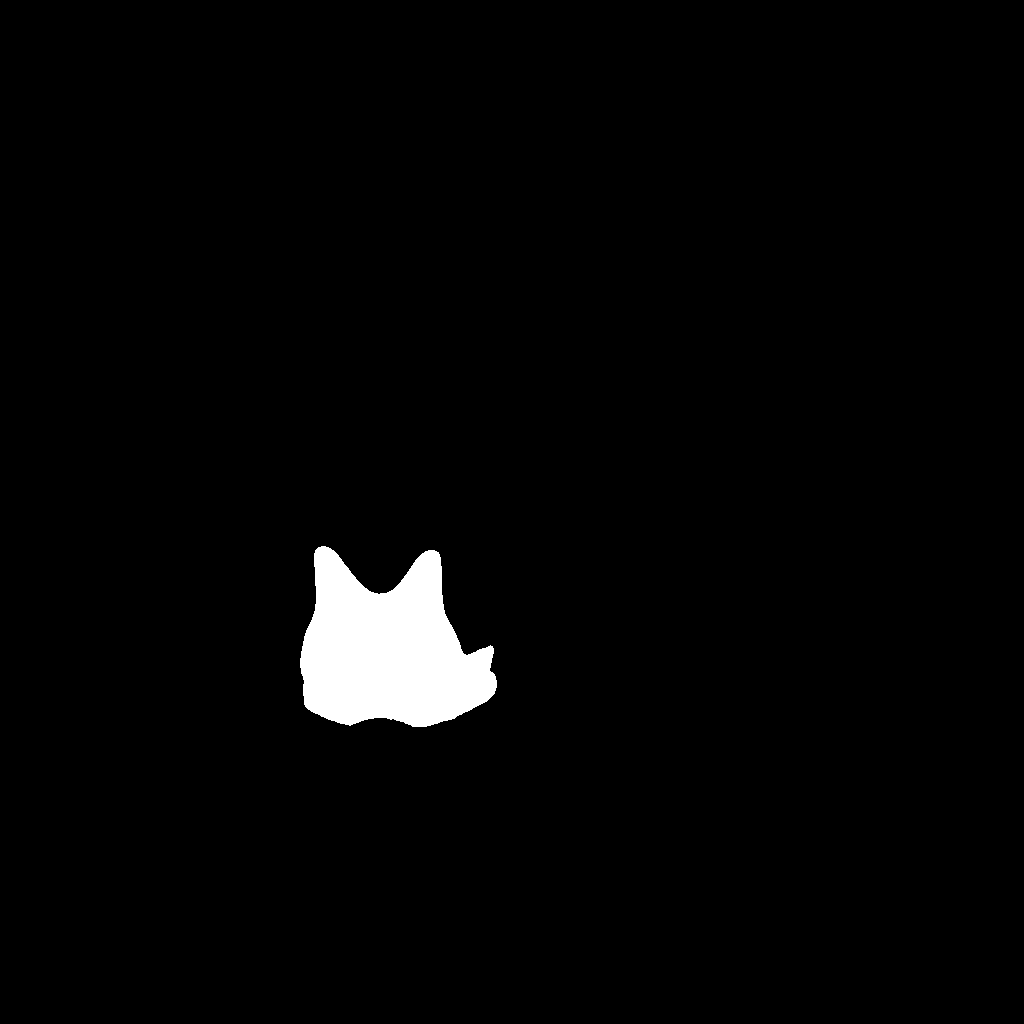

In [18]:
mask_images[1]